# SIR Process

In [1]:
import numpy as np
import numpy.random as rd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

## 一度だけシミュレーション

In [2]:
#rd.seed(20200801)
beta = 1e-9
gamma = 1e-5
N = 1000000
a = np.zeros(N+1, dtype=int)
b = np.zeros(N+1, dtype=int)
a[0] = 30000
b[0] = 100
for n in range(N):
    a[n+1] = a[n] - (1 if rd.random() < beta*a[n]*b[n] else 0)
    b[n+1] = b[n] + (1 if rd.random() < beta*a[n]*b[n] else 0) - (1 if rd.random() < gamma*b[n] else 0)

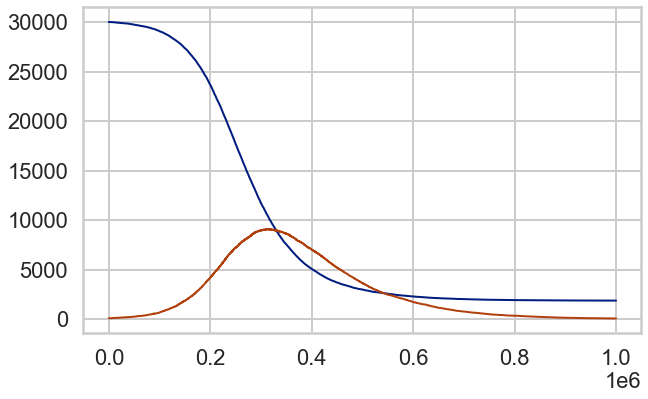

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(a, '-')
ax.plot(b, '-')

## SIRモデル

In [4]:
def SIR(t,y, b1, g1):
    dS = -b1 * y[0] * y[1]
    dI = b1 * y[0] * y[1] - g1 * y[1]
    return [dS, dI]

In [5]:
sol = solve_ivp(SIR, [0, 20], [1000,50], args=(0.0004, 0.1), dense_output=True)

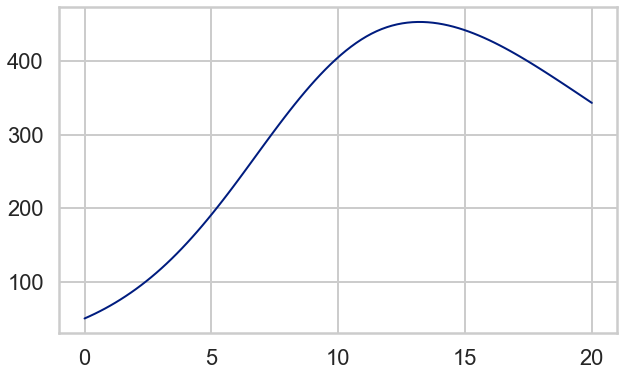

In [6]:
tt = np.linspace(0, 20, 100)
SS = sol.sol(tt)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(tt, SS[1].T)

In [7]:
def sir(beta, gamma):
    N = 200000
    a = np.zeros(N+1, dtype=int)
    b = np.zeros(N+1, dtype=int)
    a[0] = 1000
    b[0] = 50
    for n in range(N):
        a[n+1] = a[n] - (1 if rd.random() < beta*a[n]*b[n] else 0)
        b[n+1] = b[n] + (1 if rd.random() < beta*a[n]*b[n] else 0) - (1 if rd.random() < gamma*b[n] else 0)
    return b

In [8]:
b = np.array([sir(0.00000004, 0.00001) for k in range(20)])

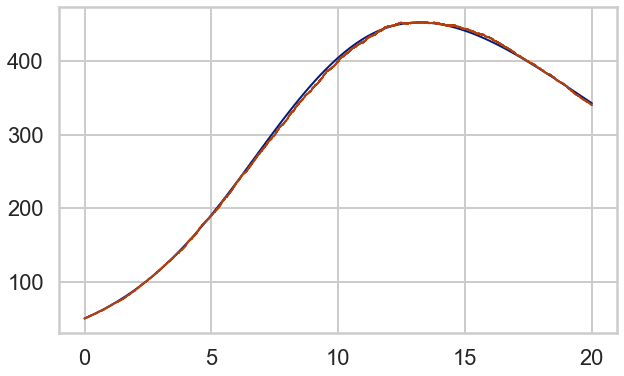

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(tt,SS[1].T)
ax.plot(np.linspace(0, 20, 200001),np.mean(b, axis=0))